In [1]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [2]:
# 쌍방울 코드 검색하기
target_name = "삼성전자"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'005930'

In [3]:
# 전체 데이터 불러오기
df = marcap_data('1995-5-2', '2021-12-31')

c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
target_df = df[df["Code"] == target_code]
latest_stocks = target_df.iloc[-1]['Stocks']
latest_stocks

5969782550.0

In [5]:
target_df['Adj Close'] = target_df['Close'] / latest_stocks * target_df['Stocks']

<ipython-input-5-f7d965bb15b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['Adj Close'] = target_df['Close'] / latest_stocks * target_df['Stocks']


In [6]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

NameError: name 'ax' is not defined

<AxesSubplot:xlabel='Date'>

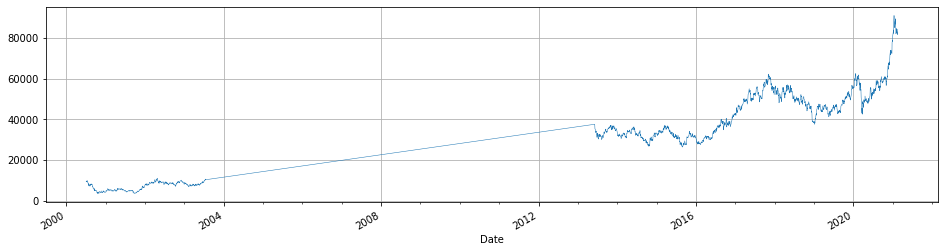

In [7]:
target_df['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

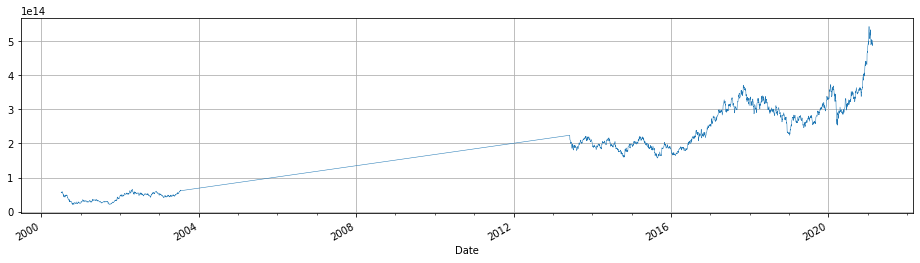

In [8]:
target_df['Marcap'].plot()

In [9]:
target_df['Marcap'][-1]

502655690710000.0

In [10]:
target_df[target_df['Adj Close'] > 40000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2016-08-23,005930,삼성전자,KOSPI,NaN,1687000.0,1,22000.0,1.32,1665000.0,1694000.0,1657000.0,230914.0,3.883166e+11,2.389962e+14,1.416693e+08,STK,1,NaN,40034.317752
2016-10-06,005930,삼성전자,KOSPI,NaN,1691000.0,1,72000.0,4.45,1696000.0,1700000.0,1667000.0,591163.0,9.946279e+11,2.395628e+14,1.416693e+08,STK,1,NaN,40129.242039
2016-10-07,005930,삼성전자,KOSPI,NaN,1706000.0,1,15000.0,0.89,1700000.0,1716000.0,1690000.0,521011.0,8.863984e+11,2.416879e+14,1.416693e+08,STK,1,NaN,40485.208112
2016-11-30,005930,삼성전자,KOSPI,NaN,1746000.0,1,69000.0,4.11,1677000.0,1747000.0,1677000.0,570704.0,9.888236e+11,2.456261e+14,1.406793e+08,STK,1,NaN,41144.902741
2016-12-01,005930,삼성전자,KOSPI,NaN,1749000.0,1,3000.0,0.17,1740000.0,1753000.0,1733000.0,310707.0,5.424483e+11,2.460482e+14,1.406793e+08,STK,1,NaN,41215.598450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [11]:
target_df[target_df['Adj Close'] > 30000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2013-06-05,005930,삼성전자,KOSPI,NaN,1521000.0,2,-19000.0,-1.23,1549000.0,1553000.0,1521000.0,271813.0,4.180479e+11,2.240423e+14,1.472993e+08,STK,1,NaN,37529.389002
2013-06-07,005930,삼성전자,KOSPI,NaN,1427000.0,2,-94000.0,-6.18,1475000.0,1485000.0,1424000.0,1085816.0,1.582893e+12,2.101962e+14,1.472993e+08,STK,1,NaN,35210.018479
2013-06-10,005930,삼성전자,KOSPI,NaN,1425000.0,2,-2000.0,-0.14,1420000.0,1443000.0,1414000.0,533554.0,7.612454e+11,2.099016e+14,1.472993e+08,STK,1,NaN,35160.670170
2013-06-11,005930,삼성전자,KOSPI,NaN,1389000.0,2,-36000.0,-2.53,1411000.0,1419000.0,1378000.0,692260.0,9.649575e+11,2.045988e+14,1.472993e+08,STK,1,NaN,34272.400607
2013-06-12,005930,삼성전자,KOSPI,NaN,1385000.0,2,-4000.0,-0.29,1378000.0,1403000.0,1362000.0,457753.0,6.332023e+11,2.040096e+14,1.472993e+08,STK,1,NaN,34173.703989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [12]:
target_df[target_df['Adj Close'] > 20000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2013-06-05,005930,삼성전자,KOSPI,NaN,1521000.0,2,-19000.0,-1.23,1549000.0,1553000.0,1521000.0,271813.0,4.180479e+11,2.240423e+14,1.472993e+08,STK,1,NaN,37529.389002
2013-06-07,005930,삼성전자,KOSPI,NaN,1427000.0,2,-94000.0,-6.18,1475000.0,1485000.0,1424000.0,1085816.0,1.582893e+12,2.101962e+14,1.472993e+08,STK,1,NaN,35210.018479
2013-06-10,005930,삼성전자,KOSPI,NaN,1425000.0,2,-2000.0,-0.14,1420000.0,1443000.0,1414000.0,533554.0,7.612454e+11,2.099016e+14,1.472993e+08,STK,1,NaN,35160.670170
2013-06-11,005930,삼성전자,KOSPI,NaN,1389000.0,2,-36000.0,-2.53,1411000.0,1419000.0,1378000.0,692260.0,9.649575e+11,2.045988e+14,1.472993e+08,STK,1,NaN,34272.400607
2013-06-12,005930,삼성전자,KOSPI,NaN,1385000.0,2,-4000.0,-0.29,1378000.0,1403000.0,1362000.0,457753.0,6.332023e+11,2.040096e+14,1.472993e+08,STK,1,NaN,34173.703989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [13]:
target_df[target_df['Adj Close'] > 10000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2002-04-02,005930,삼성전자,KOSPI,NaN,398500.0,1,24500.0,6.55,378000.0,398500.0,370000.0,1567922.0,6.034982e+11,6.052304e+13,1.518771e+08,STK,1,NaN,10138.231968
2002-04-03,005930,삼성전자,KOSPI,NaN,404000.0,1,5500.0,1.38,397500.0,405000.0,393000.0,1208603.0,4.801192e+11,6.135836e+13,1.518771e+08,STK,1,NaN,10278.157378
2002-04-17,005930,삼성전자,KOSPI,NaN,406000.0,1,17000.0,4.37,400500.0,411000.0,399000.0,1540512.0,6.254207e+11,6.166214e+13,1.518772e+08,STK,1,NaN,10329.043017
2002-04-18,005930,삼성전자,KOSPI,NaN,406500.0,1,500.0,0.12,400000.0,408500.0,397500.0,975720.0,3.930085e+11,6.173808e+13,1.518772e+08,STK,1,NaN,10341.763514
2002-04-19,005930,삼성전자,KOSPI,NaN,396000.0,2,-10500.0,-2.58,406500.0,413500.0,396000.0,1239727.0,5.010315e+11,6.014337e+13,1.518772e+08,STK,1,NaN,10074.633091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [14]:
target_df[target_df['Adj Close'] > 50000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2017-03-21,005930,삼성전자,KOSPI,NaN,2128000.0,1,33000.0,1.58,2089000.0,2134000.0,2088000.0,284403.0,6.029909e+11,2.993656e+14,1.406793e+08,STK,1,NaN,50146.823042
2017-03-22,005930,삼성전자,KOSPI,NaN,2123000.0,2,-5000.0,-0.23,2080000.0,2123000.0,2079000.0,328545.0,6.924096e+11,2.986622e+14,1.406793e+08,STK,1,NaN,50028.996860
2017-04-26,005930,삼성전자,KOSPI,NaN,2140000.0,1,5000.0,0.23,2135000.0,2140000.0,2126000.0,295896.0,6.320935e+11,2.988710e+14,1.396593e+08,STK,1,NaN,50063.964420
2017-04-27,005930,삼성전자,KOSPI,NaN,2192000.0,1,52000.0,2.43,2135000.0,2226000.0,2098000.0,460645.0,1.003800e+12,3.061333e+14,1.396593e+08,STK,1,NaN,51280.471967
2017-04-28,005930,삼성전자,KOSPI,NaN,2231000.0,1,39000.0,1.78,2289000.0,2290000.0,2226000.0,453714.0,1.024061e+12,3.115800e+14,1.396593e+08,STK,1,NaN,52192.852627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [15]:
target_df[target_df['Adj Close'] > 60000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2017-11-01,005930,삼성전자,KOSPI,NaN,2861000.0,1,107000.0,3.89,2875000.0,2875000.0,2809000.0,290205.0,8.273039e+11,3.712677e+14,1.297685e+08,STK,1,NaN,62191.153233
2017-11-02,005930,삼성전자,KOSPI,NaN,2853000.0,2,-8000.0,-0.28,2875000.0,2876000.0,2838000.0,214421.0,6.126483e+11,3.702295e+14,1.297685e+08,STK,1,NaN,62017.252769
2017-11-03,005930,삼성전자,KOSPI,NaN,2819000.0,2,-34000.0,-1.19,2853000.0,2857000.0,2793000.0,198716.0,5.590812e+11,3.639287e+14,1.290985e+08,STK,1,NaN,60961.794092
2017-11-06,005930,삼성전자,KOSPI,NaN,2819000.0,3,0.0,0.00,2819000.0,2825000.0,2767000.0,180019.0,5.037969e+11,3.639287e+14,1.290985e+08,STK,1,NaN,60961.794092
2017-11-07,005930,삼성전자,KOSPI,NaN,2805000.0,2,-14000.0,-0.50,2819000.0,2846000.0,2793000.0,149291.0,4.209059e+11,3.621213e+14,1.290985e+08,STK,1,NaN,60659.039527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,005930,삼성전자,KOSPI,NaN,83500.0,1,1000.0,NaN,83100.0,84000.0,82500.0,18036835.0,1.499218e+12,4.984768e+14,5.969783e+09,STK,1,1.21,83500.000000
2021-02-08,005930,삼성전자,KOSPI,NaN,83000.0,2,-500.0,NaN,83800.0,84200.0,83000.0,15338765.0,1.281925e+12,4.954920e+14,5.969783e+09,STK,1,-0.60,83000.000000
2021-02-09,005930,삼성전자,KOSPI,NaN,82700.0,2,-300.0,NaN,84000.0,84800.0,82700.0,20898332.0,1.748441e+12,4.937010e+14,5.969783e+09,STK,1,-0.36,82700.000000


In [16]:
target_df[target_df['Adj Close'] > 70000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2020-12-04,005930,삼성전자,KOSPI,NaN,71500.0,1,1800.0,2.58,70400.0,72100.0,70100.0,28130533.0,2.010489e+12,4.268395e+14,5.969783e+09,STK,1,NaN,71500.0
2020-12-07,005930,삼성전자,KOSPI,NaN,72900.0,1,1400.0,1.96,72400.0,73500.0,71900.0,28490496.0,2.071957e+12,4.351971e+14,5.969783e+09,STK,1,NaN,72900.0
2020-12-08,005930,삼성전자,KOSPI,NaN,71700.0,2,-1200.0,-1.65,72200.0,72900.0,71600.0,25000338.0,1.804281e+12,4.280334e+14,5.969783e+09,STK,1,NaN,71700.0
2020-12-09,005930,삼성전자,KOSPI,NaN,73900.0,1,2200.0,3.07,72100.0,73900.0,72000.0,24077996.0,1.758753e+12,4.411669e+14,5.969783e+09,STK,1,NaN,73900.0
2020-12-10,005930,삼성전자,KOSPI,NaN,72900.0,2,-1000.0,-1.35,72700.0,73800.0,72500.0,39882928.0,2.916537e+12,4.351971e+14,5.969783e+09,STK,1,NaN,72900.0
2020-12-11,005930,삼성전자,KOSPI,NaN,73400.0,1,500.0,0.69,73500.0,73800.0,73100.0,18486672.0,1.356959e+12,4.381820e+14,5.969783e+09,STK,1,NaN,73400.0
2020-12-14,005930,삼성전자,KOSPI,NaN,73800.0,1,400.0,0.54,73600.0,74500.0,73200.0,21510415.0,1.590300e+12,4.405700e+14,5.969783e+09,STK,1,NaN,73800.0
2020-12-15,005930,삼성전자,KOSPI,NaN,73800.0,3,0.0,0.00,73800.0,74100.0,73300.0,20863671.0,1.538015e+12,4.405700e+14,5.969783e+09,STK,1,NaN,73800.0
2020-12-16,005930,삼성전자,KOSPI,NaN,73800.0,3,0.0,0.00,74100.0,74500.0,73400.0,17512081.0,1.291859e+12,4.405700e+14,5.969783e+09,STK,1,NaN,73800.0


In [17]:
target_df[target_df['Adj Close'] > 80000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2020-12-30,005930,삼성전자,KOSPI,NaN,81000.0,1,2700.0,3.45,77400.0,81300.0,77300.0,29417421.0,2.344317e+12,4.835524e+14,5.969783e+09,STK,1,NaN,81000.0
2021-01-04,005930,삼성전자,KOSPI,NaN,83000.0,1,2000.0,NaN,81000.0,84400.0,80200.0,38655276.0,3.185357e+12,4.954920e+14,5.969783e+09,STK,1,2.47,83000.0
2021-01-05,005930,삼성전자,KOSPI,NaN,83900.0,1,900.0,NaN,81600.0,83900.0,81600.0,35335669.0,2.915618e+12,5.008648e+14,5.969783e+09,STK,1,1.08,83900.0
2021-01-06,005930,삼성전자,KOSPI,NaN,82200.0,2,-1700.0,NaN,83300.0,84500.0,82100.0,42089013.0,3.506904e+12,4.907161e+14,5.969783e+09,STK,1,-2.03,82200.0
2021-01-07,005930,삼성전자,KOSPI,NaN,82900.0,1,700.0,NaN,82800.0,84200.0,82700.0,32644642.0,2.726112e+12,4.948950e+14,5.969783e+09,STK,1,0.85,82900.0
2021-01-08,005930,삼성전자,KOSPI,NaN,88800.0,1,5900.0,NaN,83300.0,90000.0,83000.0,59013307.0,5.083940e+12,5.301167e+14,5.969783e+09,STK,1,7.12,88800.0
2021-01-11,005930,삼성전자,KOSPI,NaN,91000.0,1,2200.0,NaN,90000.0,96800.0,89500.0,90306177.0,8.379238e+12,5.432502e+14,5.969783e+09,STK,1,2.48,91000.0
2021-01-12,005930,삼성전자,KOSPI,NaN,90600.0,2,-400.0,NaN,90300.0,91400.0,87800.0,48682416.0,4.362546e+12,5.408623e+14,5.969783e+09,STK,1,-0.44,90600.0
2021-01-13,005930,삼성전자,KOSPI,NaN,89700.0,2,-900.0,NaN,89800.0,91200.0,89100.0,36068848.0,3.244067e+12,5.354895e+14,5.969783e+09,STK,1,-0.99,89700.0


In [18]:
target_df[target_df['Adj Close'] > 90000]

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2021-01-11,005930,삼성전자,KOSPI,NaN,91000.0,1,2200.0,NaN,90000.0,96800.0,89500.0,90306177.0,8.379238e+12,5.432502e+14,5.969783e+09,STK,1,2.48,91000.0
2021-01-12,005930,삼성전자,KOSPI,NaN,90600.0,2,-400.0,NaN,90300.0,91400.0,87800.0,48682416.0,4.362546e+12,5.408623e+14,5.969783e+09,STK,1,-0.44,90600.0


In [19]:
target_df[target_df['Date'] > '2021-01-01']

KeyError: 'Date'

In [20]:
df2 = marcap_data('2021-01-01','2021-02-15',target_code)

<AxesSubplot:xlabel='Date'>

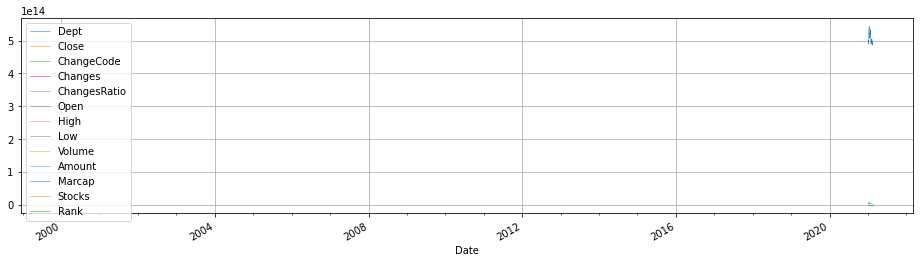

In [21]:
df2.plot()

<AxesSubplot:xlabel='Date'>

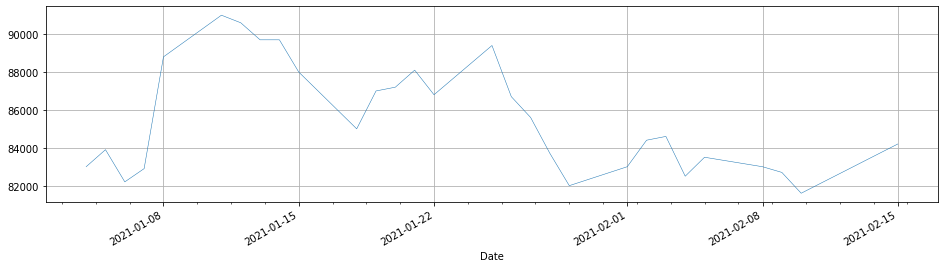

In [22]:
df2['Close'].plot()

In [23]:
df3 = marcap_data('2020-02-15', '2021-02-15', target_code)

<AxesSubplot:xlabel='Date'>

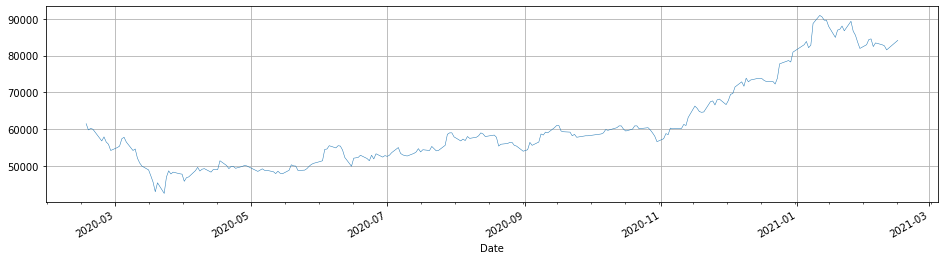

In [24]:
df3['Close'].plot()

In [26]:
df3['Stocks'][-1]

5969782550.0

In [27]:
df4 = marcap_data('2019-01-01','2021-02-15', target_code)

<AxesSubplot:xlabel='Date'>

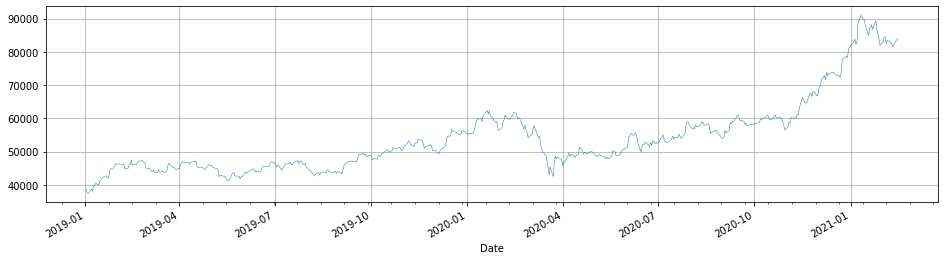

In [28]:
df4['Close'].plot()

In [29]:
df5 =  marcap_data('2018-01-01', '2021-02-15', target_code)

<AxesSubplot:xlabel='Date'>

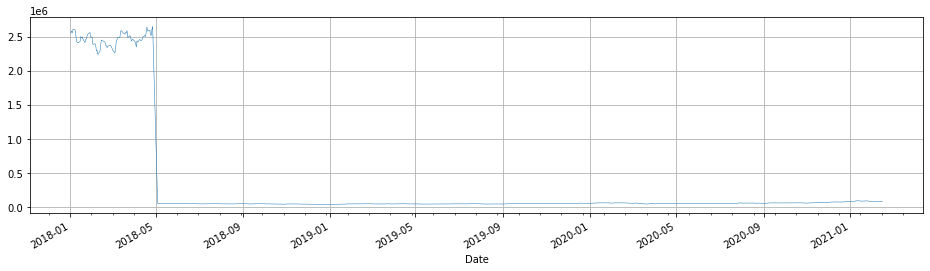

In [30]:
df5['Close'].plot()

In [31]:
latest_stocks = df5['Stocks'][-1]

In [32]:
latest_stocks

5969782550.0

In [34]:
df5['Adj Close'] = df5['Close'] * df5['Stocks'] / latest_stocks

<AxesSubplot:xlabel='Date'>

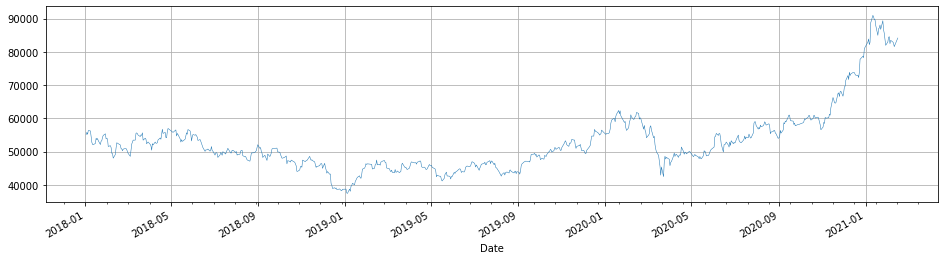

In [35]:
df5['Adj Close'].plot()

In [36]:
df6 = marcap_data('2016-01-01', '2021-02-15', target_code)

In [37]:
df6['Adj Close'] = df6['Close']  * df6['Stocks'] / latest_stocks

<AxesSubplot:xlabel='Date'>

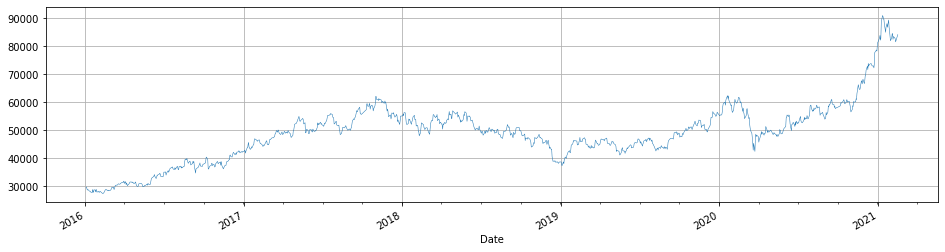

In [38]:
df6['Adj Close'].plot()

In [39]:
df7 = marcap_data('2011-01-01', '2021-02-15', target_code)

c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [40]:
df7['Adj Close'] = df7['Close'] * df7['Stocks'] / latest_stocks

<AxesSubplot:xlabel='Date'>

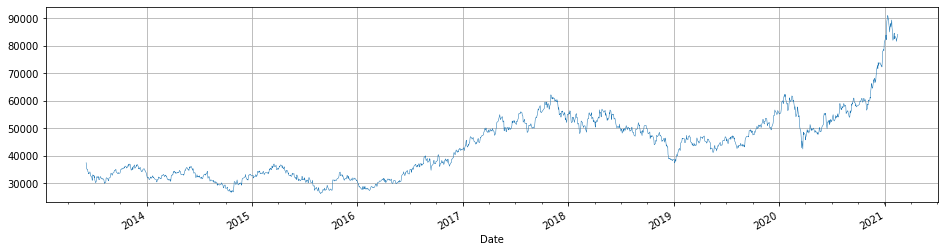

In [41]:
df7['Adj Close'].plot()

In [42]:
df7.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio,Adj Close
Date,,,,,,,,,,,,,,,,,,,
2013-06-05,005930,삼성전자,KOSPI,NaN,1521000.0,2,-19000.0,-1.23,1549000.0,1553000.0,1521000.0,271813.0,4.180479e+11,2.240423e+14,147299337.0,STK,1,NaN,37529.389002
2013-06-07,005930,삼성전자,KOSPI,NaN,1427000.0,2,-94000.0,-6.18,1475000.0,1485000.0,1424000.0,1085816.0,1.582893e+12,2.101962e+14,147299337.0,STK,1,NaN,35210.018479
2013-06-10,005930,삼성전자,KOSPI,NaN,1425000.0,2,-2000.0,-0.14,1420000.0,1443000.0,1414000.0,533554.0,7.612454e+11,2.099016e+14,147299337.0,STK,1,NaN,35160.670170
2013-06-11,005930,삼성전자,KOSPI,NaN,1389000.0,2,-36000.0,-2.53,1411000.0,1419000.0,1378000.0,692260.0,9.649575e+11,2.045988e+14,147299337.0,STK,1,NaN,34272.400607
2013-06-12,005930,삼성전자,KOSPI,NaN,1385000.0,2,-4000.0,-0.29,1378000.0,1403000.0,1362000.0,457753.0,6.332023e+11,2.040096e+14,147299337.0,STK,1,NaN,34173.703989
